# EDA 
Revision de set de datos

In [1]:
# Montar Drive de Google para datos
from google.colab import drive

drive.mount("/content/drive/")
path = "/content/drive/MyDrive/Colab/Maestria/2022_Q4/01_TC4029.10_Ciencia_y_analítica_de_datos/Equipo-37/Data/"

!ls -lart $path

Mounted at /content/drive/
total 19226
-rw------- 1 root root   525187 Apr 25  2021 water_potability.csv
-rw------- 1 root root 19159383 Sep 23 21:25 diabetic_data.csv
-rw------- 1 root root     2547 Sep 23 21:26 IDs_mapping.csv


## Librerias basicas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Cargar datos
diabetes_data = pd.read_csv(path+'diabetic_data.csv', sep=",")
potabilidad_data = pd.read_csv(path+'water_potability.csv', sep=",")

##Calidad del Agua

El acceso al agua potable es esencial para la salud, un derecho humano básico y un componente de una política eficaz de protección de la salud. Es importante como cuestión de salud y desarrollo a nivel nacional, regional y local. En algunas regiones, se ha demostrado que las inversiones en abastecimiento de agua y saneamiento pueden producir un beneficio económico neto, ya que la reducción de los efectos adversos para la salud y los costes de la atención sanitaria superan los costes de las intervenciones.

>Variable objetivo: **`Potabilidad`**

[water_potability.csv](https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download)

### Info

In [36]:
potabilidad_data.sample(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
506,NaN,218.302176,42061.322799,6.331177,324.541596,503.139245,15.712139,48.497826,4.328026,0
3025,7.149125,202.582542,23158.389096,6.067812,302.002743,301.984240,17.622595,42.292766,3.787033,0
773,6.848330,195.451482,15908.642086,6.241349,319.264722,404.204859,18.937338,75.392795,3.732202,1


In [4]:
potabilidad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


###Descripcion

In [23]:
#Descripcion de los datos
potabilidad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


###Datos perdidos

In [8]:
#Datos perdidos
potabilidad_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [22]:
print('Total de datos: ', potabilidad_data.shape[0])
print('Total de datos no nulos: ', potabilidad_data.dropna().shape[0])

Total de datos:  3276
Total de datos no nulos:  2011


### Visualizacion basica

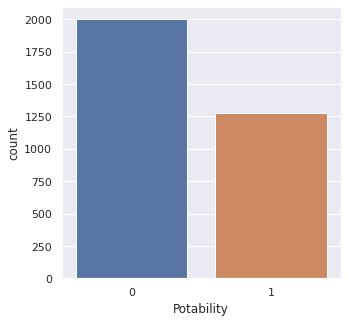

% de agua potable  39.010989010989015


In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x=potabilidad_data['Potability'])
plt.show()
sns.set(font_scale=1)
print('% de agua potable ',potabilidad_data['Potability'].sum()*100/potabilidad_data.shape[0])

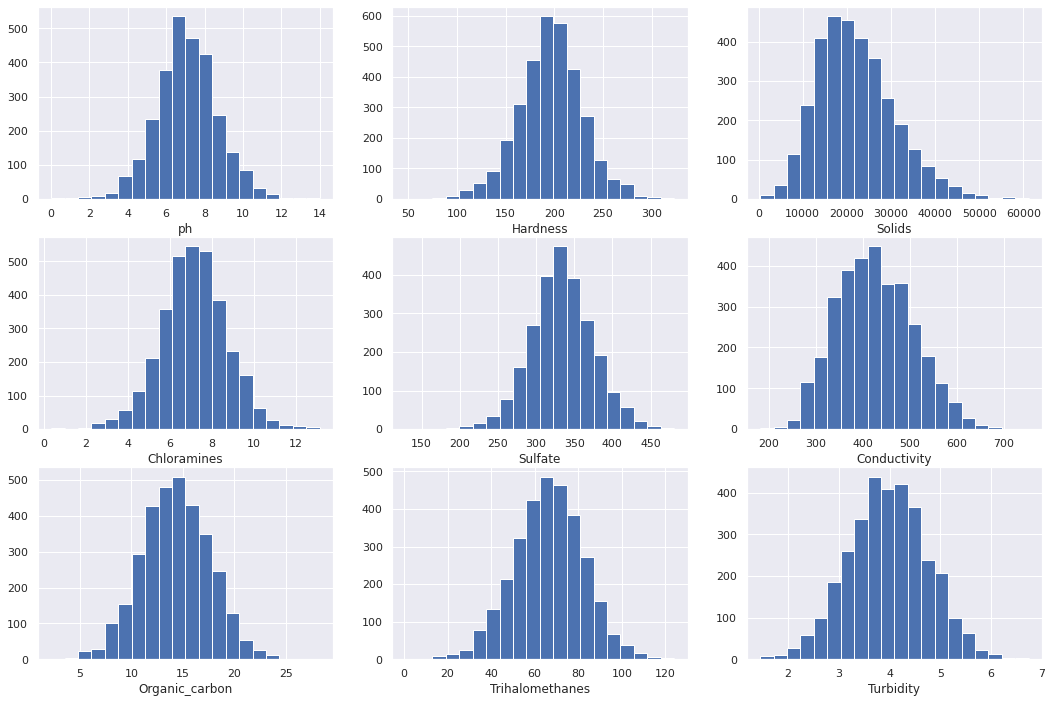

In [18]:
sns.set(rc={'figure.figsize':(18,12)}) 

fig, axes = plt.subplots(3, 3)    
for k in range(0,9):
  plt.subplot(3,3,k+1)     
  plt.hist(potabilidad_data[potabilidad_data.columns[k]], bins=20)   
  plt.xlabel(potabilidad_data.columns[k])
plt.show()

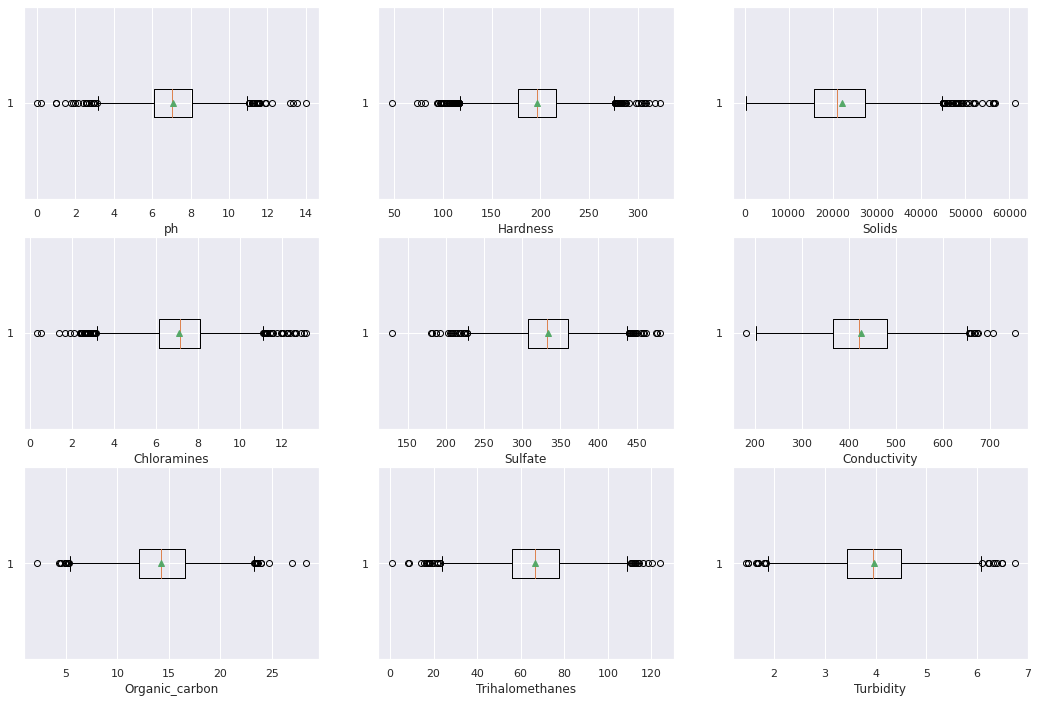

In [21]:
sns.set(rc={'figure.figsize':(18,12)}) 
fig, axes = plt.subplots(3, 3)    
for k in range(0,9):
  plt.subplot(3,3,k+1)     
  plt.boxplot(potabilidad_data[potabilidad_data.columns[k]].dropna(), showmeans=True, vert=False)   
  plt.xlabel(potabilidad_data.columns[k])
plt.show()

### Croscorrelacion

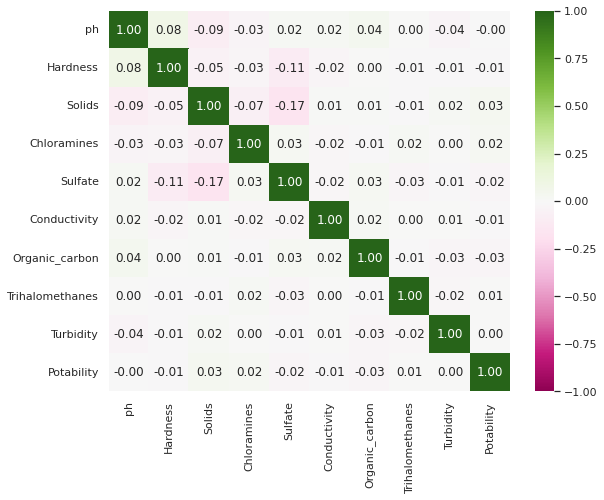

In [67]:
sns.set(rc={'figure.figsize':(9,7)}) 

sns.heatmap(potabilidad_data.corr(method='pearson'), cmap='PiYG', annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.show()

##Diabetes

**Impacto de la medición de la HbA1c en las tasas de reingreso hospitalario: Análisis de 70.000 registros de pacientes de bases de datos clínicas**

El manejo de la hiperglucemia en los pacientes hospitalizados tiene una influencia significativa en el resultado, tanto en términos de morbilidad como de mortalidad. Sin embargo, hay pocas evaluaciones nacionales de la atención a la diabetes durante la hospitalización que puedan servir de referencia para el cambio. Este análisis de una gran base de datos clínicos (74 millones de encuentros únicos correspondientes a 17 millones de pacientes únicos) se llevó a cabo para proporcionar dicha evaluación y para encontrar futuras direcciones que pudieran conducir a mejoras en la seguridad del paciente. Se identificaron casi 70.000 encuentros de pacientes hospitalizados con diabetes con suficiente detalle para el análisis. Se utilizó una regresión logística multivariable para ajustar la relación entre la medición de la HbA1c y el reingreso temprano, controlando al mismo tiempo covariables como la demografía, la gravedad y el tipo de enfermedad, y el tipo de ingreso. Los resultados muestran que la medición de la HbA1c se realizó con poca frecuencia (18,4%) en el ámbito de la hospitalización. El modelo estadístico sugiere que la relación entre la probabilidad de reingreso y la medición de la HbA1c depende del diagnóstico primario. Los datos sugieren además que la mayor atención a la diabetes reflejada en la determinación de la HbA1c puede mejorar los resultados de los pacientes y reducir el coste de la atención hospitalaria.


>Variable objetivo: **`readmitted`**

[diabetic_data.csv](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#)

### Info

In [37]:
diabetes_data.sample(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
45139,139406316,42078978,Caucasian,Female,[30-40),?,1,1,7,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
44480,137106204,48241341,Caucasian,Male,[60-70),?,3,1,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
47048,144824382,43920450,Caucasian,Female,[60-70),?,5,1,1,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [34]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Descripcion

In [53]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [40]:
#Descripcion de los datos
diabetes_data.describe(include=[object]).T

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,101766,4,None,96420


In [41]:
diabetes_data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

###Datos perdidos

In [42]:
#Datos perdidos
diabetes_data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [44]:
print('Total de datos: ', diabetes_data.shape[0])
print('Total de datos no nulos: ', diabetes_data.dropna().shape[0])

Total de datos:  101766
Total de datos no nulos:  101766


###Visualizacion basica

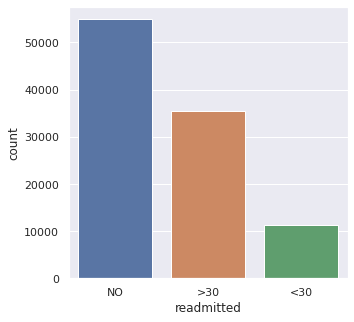

% de NO : 53.91191557101586
% de >30 : 34.92816854352141
% de <30 : 11.159915885462729


In [52]:
plt.figure(figsize=(5,5))
sns.countplot(x=diabetes_data['readmitted'])
plt.show()
sns.set(font_scale=1)
for label in diabetes_data['readmitted'].unique():
  print('% de '+label+' :', diabetes_data[diabetes_data['readmitted']==label]['readmitted'].count()*100/diabetes_data.shape[0])

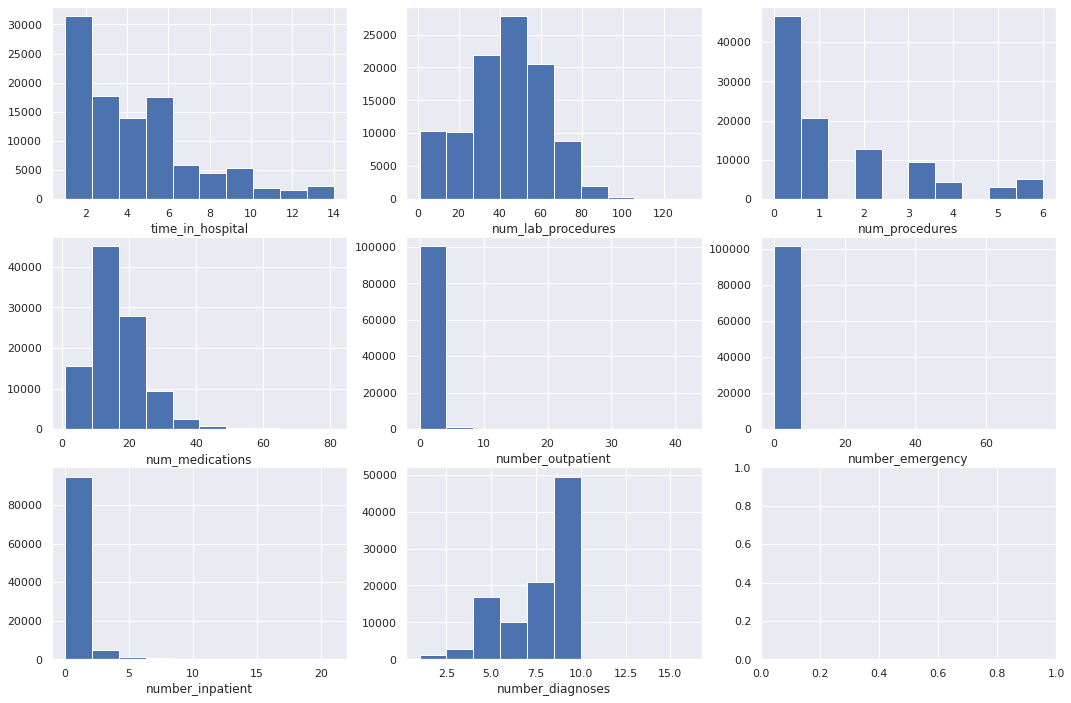

In [61]:
sns.set(rc={'figure.figsize':(18,12)}) 

#Variables numericas
intCols=list(diabetes_data.columns[diabetes_data.dtypes=='int64'])[5:]

fig, axes = plt.subplots(3, 3)    
for k in range(len(intCols)):
  plt.subplot(3,3,k+1)     
  plt.hist(diabetes_data[intCols[k]])   
  plt.xlabel(intCols[k])
plt.show()

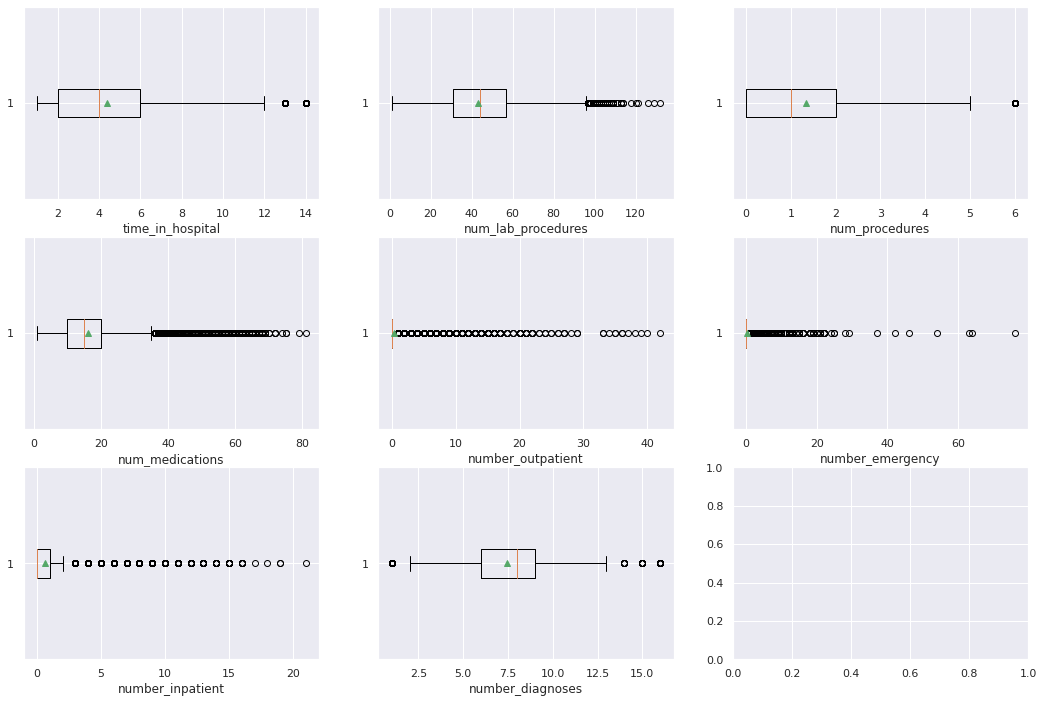

In [62]:
fig, axes = plt.subplots(3, 3)    
for k in range(len(intCols)):
  plt.subplot(3,3,k+1)     
  plt.boxplot(diabetes_data[intCols[k]], showmeans=True, vert=False)   
  plt.xlabel(intCols[k])
plt.show()

###Croscorrelacion

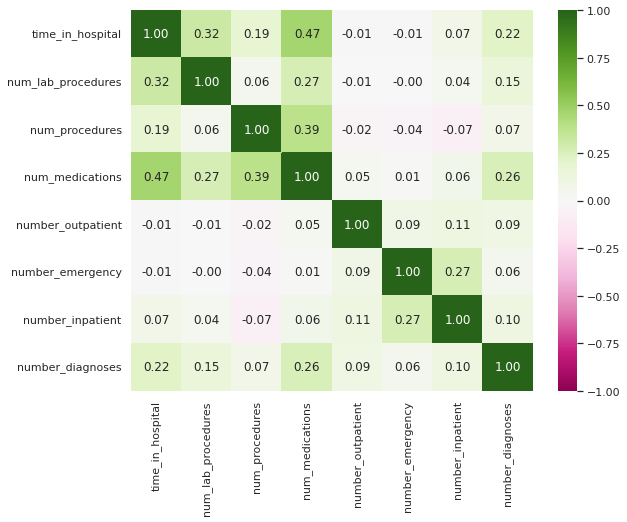

In [66]:
sns.set(rc={'figure.figsize':(9,7)}) 

sns.heatmap(diabetes_data[intCols].corr(method='pearson'), cmap='PiYG', annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.show()